In [38]:
import pandas as pd
import numpy as np
# Reading in the Olympic dataset
olympic_data = pd.read_csv('athlete_events.csv')

# Print first couple rows of the data
print(olympic_data.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Creating an overall medal summary table by NOC

overall_medal_summary = olympic_data.groupby('NOC')['Medal'].value_counts().unstack().fillna(0)
overall_medal_summary['Total'] = overall_medal_summary.sum(axis=1)
overall_medal_summary.reset_index(inplace=True)
overall_medal_summary.columns = ['Team', 'Gold', 'Silver', 'Bronze', 'Total']

# Display the resulting DataFrame
print(overall_medal_summary)

    Team  Gold  Silver  Bronze  Total
0    AFG   2.0     0.0     0.0    2.0
1    AHO   0.0     0.0     1.0    1.0
2    ALG   8.0     5.0     4.0   17.0
3    ANZ   5.0    20.0     4.0   29.0
4    ARG  91.0    91.0    92.0  274.0
..   ...   ...     ...     ...    ...
144  VIE   0.0     1.0     3.0    4.0
145  WIF   5.0     0.0     0.0    5.0
146  YUG  93.0   130.0   167.0  390.0
147  ZAM   1.0     0.0     1.0    2.0
148  ZIM   1.0    17.0     4.0   22.0

[149 rows x 5 columns]


In [41]:
# Load the NOC regions dataset
noc_regions = pd.read_csv('noc_regions.csv')  # Replace with the actual path

country_regions = noc_regions[['NOC', 'region']].rename(columns={'region': 'country'})

# Merge the overall_medal_summary with country_regions
medals_with_country = pd.merge(overall_medal_summary, country_regions, how='left', left_on='Team', right_on='NOC')

print(medals_with_country)

    Team  Gold  Silver  Bronze  Total  NOC      country
0    AFG   2.0     0.0     0.0    2.0  AFG  Afghanistan
1    AHO   0.0     0.0     1.0    1.0  AHO      Curacao
2    ALG   8.0     5.0     4.0   17.0  ALG      Algeria
3    ANZ   5.0    20.0     4.0   29.0  ANZ    Australia
4    ARG  91.0    91.0    92.0  274.0  ARG    Argentina
..   ...   ...     ...     ...    ...  ...          ...
144  VIE   0.0     1.0     3.0    4.0  VIE      Vietnam
145  WIF   5.0     0.0     0.0    5.0  WIF     Trinidad
146  YUG  93.0   130.0   167.0  390.0  YUG       Serbia
147  ZAM   1.0     0.0     1.0    2.0  ZAM       Zambia
148  ZIM   1.0    17.0     4.0   22.0  ZIM     Zimbabwe

[149 rows x 7 columns]


In [42]:
# Making sure the merge worked correctly - checking to make sure all countries matched

mismatched_rows = medals_with_country[medals_with_country['Team'] != medals_with_country['NOC']]

print(f"Number of mismatched rows: {len(mismatched_rows)}")

mismatched_row = medals_with_country[medals_with_country['Team'] != medals_with_country['NOC']]
print("Mismatched Row:")
print(mismatched_row)

# We can see that the only country without a match was SGP (Singapore) - we will correct this now

medals_with_country.loc[medals_with_country['Team'] == 'SGP', 'country'] = 'Singapore'

# Drop the redundant 'NOC' column

medals_with_country.drop('NOC', axis=1, inplace=True)

print(medals_with_country)

Number of mismatched rows: 1
Mismatched Row:
    Team  Gold  Silver  Bronze  Total  NOC country
115  SGP   4.0     1.0     4.0    9.0  NaN     NaN
    Team  Gold  Silver  Bronze  Total      country
0    AFG   2.0     0.0     0.0    2.0  Afghanistan
1    AHO   0.0     0.0     1.0    1.0      Curacao
2    ALG   8.0     5.0     4.0   17.0      Algeria
3    ANZ   5.0    20.0     4.0   29.0    Australia
4    ARG  91.0    91.0    92.0  274.0    Argentina
..   ...   ...     ...     ...    ...          ...
144  VIE   0.0     1.0     3.0    4.0      Vietnam
145  WIF   5.0     0.0     0.0    5.0     Trinidad
146  YUG  93.0   130.0   167.0  390.0       Serbia
147  ZAM   1.0     0.0     1.0    2.0       Zambia
148  ZIM   1.0    17.0     4.0   22.0     Zimbabwe

[149 rows x 6 columns]


In [43]:
# Merging with the country profile variables dataset

country_profile_variables = pd.read_csv('country_profile_variables.csv')

merged_data = pd.merge(medals_with_country, country_profile_variables, how='left', on='country')

# Find rows where there wasn't a match
unmatched_rows = merged_data[merged_data['Region'].isna()]

# Print the unmatched rows - these will be corrected manually or dropped
print(unmatched_rows)
print(merged_data)

    Team    Gold  Silver  Bronze   Total                      country Region  \
1    AHO     0.0     0.0     1.0     1.0                      Curacao    NaN   
15   BOH    11.0     0.0     1.0    12.0               Czech Republic    NaN   
23   CIV     1.0     1.0     1.0     3.0                  Ivory Coast    NaN   
30   CZE    66.0    42.0    36.0   144.0               Czech Republic    NaN   
40   EUN    81.0   127.0    71.0   279.0                       Russia    NaN   
46   GBR   651.0   678.0   739.0  2068.0                           UK    NaN   
60   IOA     3.0     1.0     1.0     5.0  Individual Olympic Athletes    NaN   
61   IRI    29.0    18.0    21.0    68.0                         Iran    NaN   
66   ISV     0.0     0.0     1.0     1.0           Virgin Islands, US    NaN   
74   KOR   185.0   221.0   232.0   638.0                  South Korea    NaN   
75   KOS     0.0     1.0     0.0     1.0                       Kosovo    NaN   
85   MDA     5.0     0.0     3.0     8.0

In [44]:
# Create a dictionary of manual matches
manual_matches = {
    'BOH': 'Czechia',
    'CIV': None,
    'CZE': 'Czechia',
    'EUN': 'Russian Federation',
    'GBR': 'United Kingdom',
    'IOA': None,
    'IRI': 'Iran (Islamic Republic of)',
    'ISV': 'United States Virgin Islands',
    'KOR': 'Republic of Korea',
    'KOS': None,
    'MDA': 'Republic of Moldova',
    'MKD': None,
    'PRK': "Democratic People's Republic of Korea",
    'RUS': 'Russian Federation',
    'SYR': 'Syrian Arab Republic',
    'TAN': 'United Republic of Tanzania',
    'TCH': 'Czechia',
    'TPE': None,
    'TTO': 'Trinidad and Tobago',
    'UAR': 'Syrian Arab Republic',
    'URS': 'Russian Federation',
    'USA': 'United States of America',
    'VEN': 'Venezuela (Bolivarian Republic of)',
    'VIE': 'Viet Nam',
    'WIF': 'Trinidad and Tobago'
}

# Update names for countries
for team, country in manual_matches.items():
    if country is not None:
        medals_with_country.loc[medals_with_country['Team'] == team, 'country'] = country


# Continue with the merging
country_profile_variables = pd.read_csv('country_profile_variables.csv')
medal_count_with_country_data = pd.merge(medals_with_country, country_profile_variables, how='left', on='country')

# Drop rows where 'Region' has NaN values
medal_count_with_country_data = medal_count_with_country_data.dropna(subset=['Region'])

In [45]:
medal_count_with_country_data

,Team,Gold,Silver,Bronze,Total,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)",...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,AFG,2.0,0.0,0.0,2.0,Afghanistan,SouthernAsia,652864,35530.0,54.4,...,8.3,42.0,2.1,9.8/0.3,63.0,5.0,78.2/47.0,45.1/27.0,21.43,-99.0
2,ALG,8.0,5.0,4.0,17.0,Algeria,NorthernAfrica,2381741,41318.0,17.3,...,38.2,135.0,0.8,145.4/3.7,5900.0,55.0,84.3/81.8,89.8/82.2,0.05,-99.0
3,ANZ,5.0,20.0,4.0,29.0,Australia,Oceania,7692060,24451.0,3.2,...,84.6,948.0,16.2,361.3/15.3,15282.0,222.0,100.0/100.0,100.0/100.0,-99,-99.0
4,ARG,91.0,91.0,92.0,274.0,Argentina,SouthAmerica,2780400,44271.0,16.2,...,69.4,256.0,10.0,204.0/4.7,3167.0,85.0,99.0/100.0,96.2/98.3,0.01,-99.0
5,ARM,9.0,2.0,5.0,16.0,Armenia,WesternAsia,29743,2930.0,102.9,...,58.2,114.0,11.7,5.5/1.8,48.0,46.0,100.0/100.0,96.2/78.2,3.17,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,VIE,0.0,1.0,3.0,4.0,Viet Nam,South-easternAsia,330967,95541.0,308.1,...,52.7,616.0,47.2,166.9/1.8,2977.0,30.0,99.1/96.9,94.4/69.7,1.73,-99.0
145,WIF,5.0,0.0,0.0,5.0,Trinidad and Tobago,Caribbean,5127,1369.0,266.9,...,69.2,69.0,45.4,46.3/34.2,1663.0,607.0,95.1/95.1,91.5/91.5,...,-99.0
146,YUG,93.0,130.0,167.0,390.0,Serbia,SouthernEurope,88499,8791.0,100.5,...,65.3,71.0,31.1,37.7/4.3,393.0,62.0,99.4/98.9,98.2/94.2,0.90,-99.0
147,ZAM,1.0,0.0,1.0,2.0,Zambia,EasternAfrica,752612,17094.0,23.0,...,21.0,88.0,65.6,4.5/0.3,374.0,26.0,85.6/51.3,55.6/35.7,3.96,-99.0


In [46]:
# Check for duplicate countries
duplicate_countries = medal_count_with_country_data[medal_count_with_country_data.duplicated(subset=['country'])]

# Print duplicate countries
print("Duplicate Countries:")
print(duplicate_countries[['country', 'Team']])

# There are some duplicates - this is from changing NOC codes over time, we will keep the row with most medals for simplicity purposes
medal_count_with_country_data['Total'] = medal_count_with_country_data['Gold'] + medal_count_with_country_data['Silver'] + medal_count_with_country_data['Bronze']
max_medals_rows = medal_count_with_country_data.loc[medal_count_with_country_data.groupby('country')['Total'].idxmax()]

medal_count_with_country_data = max_medals_rows.copy()
print(medal_count_with_country_data)


Duplicate Countries:
                  country Team
6               Australia  AUS
30                Czechia  CZE
47                Germany  GDR
49                Germany  GER
56                  China  HKG
112    Russian Federation  RUS
117                Serbia  SRB
126               Czechia  TCH
136  Syrian Arab Republic  UAR
139    Russian Federation  URS
145   Trinidad and Tobago  WIF
146                Serbia  YUG
    Team   Gold  Silver  Bronze   Total                             country  \
0    AFG    2.0     0.0     0.0     2.0                         Afghanistan   
2    ALG    8.0     5.0     4.0    17.0                             Algeria   
4    ARG   91.0    91.0    92.0   274.0                           Argentina   
5    ARM    9.0     2.0     5.0    16.0                             Armenia   
6    AUS  517.0   348.0   455.0  1320.0                           Australia   
..   ...    ...     ...     ...     ...                                 ...   
142  UZB   17.0    10.0

In [47]:
# Change certain row data types to numeric
medal_count_with_country_data['Infant mortality rate (per 1000 live births'] = pd.to_numeric(medal_count_with_country_data['Infant mortality rate (per 1000 live births'], errors='coerce')
medal_count_with_country_data['Health: Physicians (per 1000 pop.)'] = pd.to_numeric(medal_count_with_country_data['Health: Physicians (per 1000 pop.)'], errors='coerce')
medal_count_with_country_data['Unemployment (% of labour force)'] = pd.to_numeric(medal_count_with_country_data['Unemployment (% of labour force)'], errors='coerce')

# Missing data currently has a value of -99 rather than just being empty
medal_count_with_country_data.replace(-99, np.nan, inplace=True)

In [48]:
# Averaging male and female life expectancies to get one value for each country

life_expectancy_column = 'Life expectancy at birth (females/males, years)'
life_expectancies = medal_count_with_country_data[life_expectancy_column].str.split('/', expand=True)
life_expectancies = life_expectancies.apply(pd.to_numeric, errors='coerce')
mean_life_expectancy = life_expectancies.mean(axis=1, skipna=True)

# Replace the original column with the mean values
medal_count_with_country_data[life_expectancy_column] = mean_life_expectancy

In [49]:
# At this point, the data set is ready for further analysis

# Let's start by a simple graph showing total medal count by country

import plotly.express as px

fig_medals = px.choropleth(
    medal_count_with_country_data,
    locations='country',
    locationmode='country names',
    color='Total',
    color_continuous_scale='Viridis',
    title='Medal Count by Country',
    labels={'Total': 'Medal Count'}
)

fig_medals.show()

In [50]:
# Convert to HTML
html_string = fig_medals.to_html(full_html=False, include_plotlyjs='cdn')
with open('my_map.html', 'w') as f:
    f.write(html_string)

In [51]:
fh1 = open('viz1.png', 'w')
fh1.close()

In [52]:
import plotly.io as pio
pio.write_html(fig_medals, file = 'viz1.png', auto_open = True, full_html = False)

# Insight 1:
It is clear from the visualization there is a significant amount of grographical disparity related to overall medal count. Wealthier countries appear, for the most part, to hold a dominant position in terms of total mdeal count. This suggests a possible correlation between economic development and success in the Olympics which would require further analysis.
# Insight 2:
There are a few nations, notably the United States and Russia among other western European countries which appear toi dominate in medal count. Surprisingly, some of the smaller countries in Europe appear to be pretty small and I would assume hold a much smaller total population than the USA. These countries may have better infrastructure for athletes or maybe just have been involved with the Olympics for a longer period of time than other nations.
# Insight 3:
This visualization reveals a large number of countries across the world participate in the Olympics and have won medals doing so. This speaks to the global nature of the Olympics and also invites questions as to why some nations have been unsuccessful in medal accumulation.

In [53]:
# medal count by itself is largely meaningless - let's normalize by population

import plotly.express as px

medal_count_with_country_data['Normalized_Medals'] = medal_count_with_country_data['Total'] / (medal_count_with_country_data['Population in thousands (2017)'] * 1000)

fig_normalized_medals = px.choropleth(
    medal_count_with_country_data,
    locations='country',
    locationmode='country names',
    color='Normalized_Medals',
    color_continuous_scale='Viridis',
    title='Normalized Medal Count (Total Medal Count / Population)',
    labels={'Normalized_Medals': 'Normalized Medal Count'},
    range_color=[0, 0.00005]  # Adjust the range based on your data
)

fig_normalized_medals.show()

In [54]:
# Convert to HTML
html_string = fig_normalized_medals.to_html(full_html=False, include_plotlyjs='cdn')
with open('my_map2.html', 'w') as f:
    f.write(html_string)

In [55]:
fh2 = open('viz2.png', 'w')
fh2.close()

In [56]:
import plotly.io as pio
pio.write_html(fig_normalized_medals, file = 'viz2.png', auto_open = True, full_html = False)

# Insight 1:
When Olympic success is normalized by population, the map reveals that some smaller countries perform exceptionally well on a per capita basis. This suggests that smaller nations can, and often do, produce high-quality athletes that can compete on the global stage, indicating that a country's Olympic success is not solely dependent on its population size.
# Insight 2:
The countries with the lightest shades, representing the highest normalized medal counts, are likely to have very efficient systems for identifying and nurturing athletic talent. This could be a result of focused investment in certain sports where they have competitive advantages or historical success.
# Insight 3:
The normalization of medal counts provides a more equitable view of Olympic success, highlighting the achievements of countries such as Australia that may not have large medal totals but excel relative to their population size. This perspective is important when considering the distribution of resources and support for athletes across different countries.

In [57]:
# Let's now look at which countries have hostorically overperformed and underperformed at the Olympics based upon the
# number of medals they have won and their current population

# Calculate the total medals won globally and the total population globally

import plotly.express as px

total_medals = medal_count_with_country_data['Total'].sum()
total_population = medal_count_with_country_data['Population in thousands (2017)'].sum() * 1000

# Calculate the expected medal count for each country
medal_count_with_country_data['Expected_Medals'] = (
    total_medals / total_population * (medal_count_with_country_data['Population in thousands (2017)'] * 1000)
)

# Calculate the difference between actual medal count and expected medal count
medal_count_with_country_data['Medal_Difference'] = medal_count_with_country_data['Total'] - medal_count_with_country_data['Expected_Medals']

# Determine if a country is an overperformer or underperformer
medal_count_with_country_data['Performance'] = ['Overperformer' if diff > 0 else 'Underperformer' for diff in medal_count_with_country_data['Medal_Difference']]

# Sort the DataFrame by Medal_Difference
sorted_df = medal_count_with_country_data.sort_values(by='Medal_Difference', ascending=False)

# Create a bar chart for top 5 overperformers and top 5 underperformers
fig_combined = px.bar(
    sorted_df.head(5).append(sorted_df.tail(5)),  # Combine top 5 overperformers and top 5 underperformers
    x='country',
    y='Medal_Difference',
    color='Performance',  # Color based on performance
    title='Top 5 Historical Overperformers and Underperformers in Total Medal Count (Based on Population)',
    labels={'Medal_Difference': 'Medal Count Difference'},
)

fig_combined.update_layout(
    xaxis_title='Country',
    yaxis_title='Medal Count Difference',
)

fig_combined.show()

<ipython-input-57-23d301e4df81>:27: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [58]:
# Convert to HTML
html_string = fig_combined.to_html(full_html=False, include_plotlyjs='cdn')
with open('my_map3.html', 'w') as f:
    f.write(html_string)

# Insight 1:
The blue bars, representing overperformers, include countries like the United States, Russia, Germany, and the United Kingdom. These nations have historically achieved a higher medal count relative to their populations. This success could be attributed to factors such as long-term investment in sports, comprehensive training systems, and robust support for athletes.
# Insight 2:
The red bars indicate countries like China and India as significant underperformers relative to their population size. Despite having large populations which theoretically provide a larger talent pool, these countries have a lower medal count per capita. This could point towards challenges such as the allocation of resources, prioritization of sports, or other socio-economic factors affecting their ability to convert population size into Olympic success.
# Insight 3:
Sweden stands out as a smaller country that has historically outperformed in terms of medals per capita, suggesting a highly efficient sports infrastructure. On the other hand, countries with large populations and fewer medals, such as Nigeria, Pakistan, Indonesia, and the already mentioned China and India, highlight the complexity of turning a large population into a proportionally large medal haul. It indicates that having a high population is not a straightforward advantage in the Olympics, and other factors like investment in sports infrastructure, the popularity of sports, and government support play significant roles.

In [59]:
# After noticing that there are countries that have heavily over and underperformed in Olympic history, let's explore why
# First - could per capita gdp have an influence?

import plotly.express as px

# Create a bubble plot with trendline
fig_bubble_trendline = px.scatter(
    medal_count_with_country_data,
    x='GDP per capita (current US$)',
    y='Normalized_Medals',
    size='Total',
    title='Bubble Plot with Trendline: GDP per capita vs Normalized Medal Count',
    labels={'Normalized_Medals': 'Normalized Medal Count', 'Total': 'Total Medal Count'},
    color='Total',
    hover_name='country',
    trendline='ols',  # Add Ordinary Least Squares (OLS) trendline
)

# Update the layout for better readability
fig_bubble_trendline.update_layout(
    xaxis_title='GDP per capita (current US$)',
    yaxis_title='Normalized Medal Count',
)

# Show the plot
fig_bubble_trendline.show()

In [60]:
# Convert to HTML
html_string = fig_bubble_trendline.to_html(full_html=False, include_plotlyjs='cdn')
with open('my_map4.html', 'w') as f:
    f.write(html_string)

# Insight 1:
There appears to be a positive trend line suggesting that as GDP per capita increases, so does the normalized medal count. This could imply that wealthier countries have more resources to invest in sports, leading to greater Olympic success.
# Insight 2:
While the trend line indicates a general correlation, there are clearly outliers. Some countries with a high GDP per capita have a relatively low normalized medal count, and vice versa. This highlights that while economic wealth may contribute to sporting success, it is not the sole determinant; other factors such as cultural emphasis on sports, government investment, and the presence of high-quality training facilities and coaching staff also play a critical role.
# Insight 3:
The plot includes some very large bubbles, indicating countries with high total medal counts. Their position on the plot relative to GDP per capita varies, suggesting that some countries achieve high medal counts despite not having the highest GDP per capita, possibly due to the factors mentioned above or a particularly strong tradition and emphasis on Olympic sports.

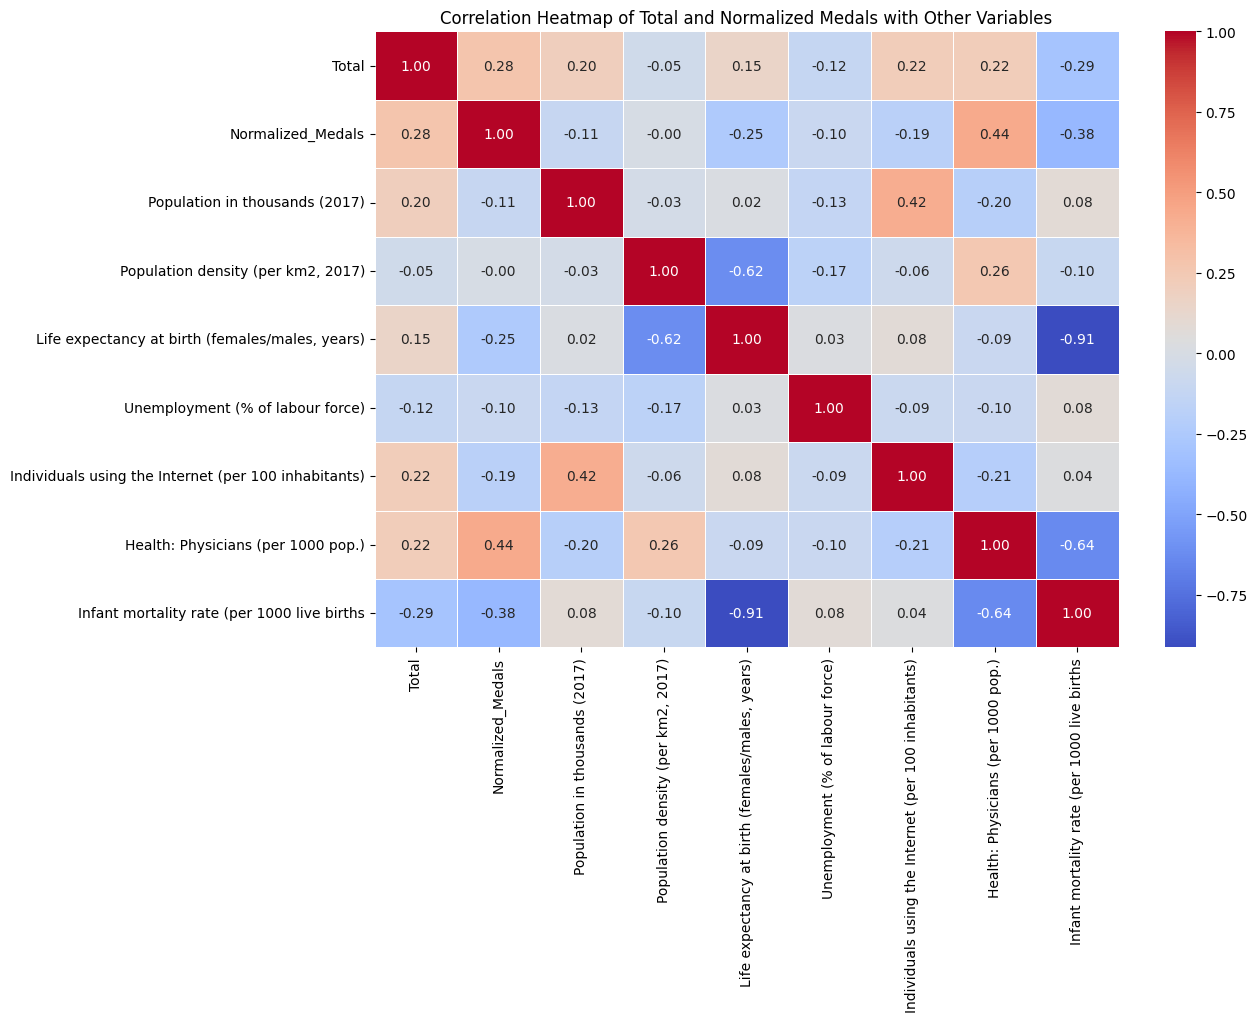

In [61]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select relevant columns for the heatmap
heatmap_columns = [
    'Total',
    'Normalized_Medals',
    'Population in thousands (2017)',
    'Population density (per km2, 2017)',
    'Life expectancy at birth (females/males, years)',
    'Unemployment (% of labour force)',
    'Individuals using the Internet (per 100 inhabitants)',
    'Health: Physicians (per 1000 pop.)',
    'Infant mortality rate (per 1000 live births'
]

# Create a new DataFrame for the heatmap
heatmap_data = medal_count_with_country_data[heatmap_columns]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Total and Normalized Medals with Other Variables')

plt.savefig('heatmap.png', bbox_inches='tight', dpi=300)

plt.show()

plt.close()

The above is interesting but may be a bit much to include.

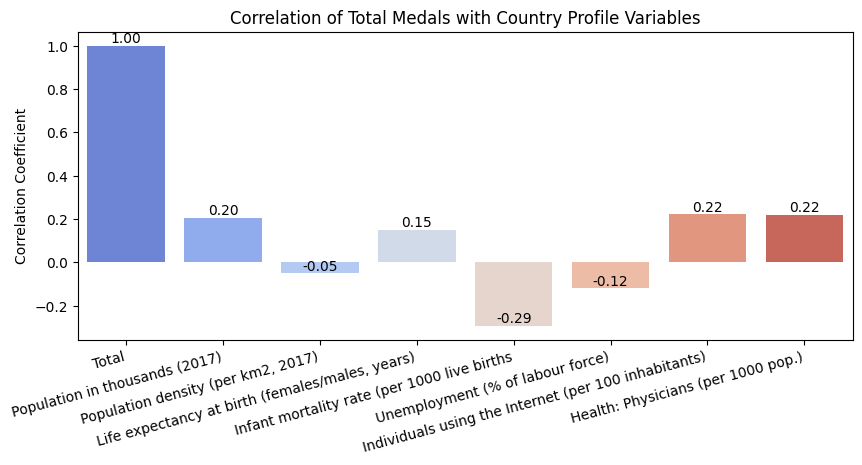

In [62]:
# Zone in the values that are interesting to us - start with correlation values for total medals

# Select relevant columns for the heatmap
heatmap_columns = [
    'Total',
    'Population in thousands (2017)',
    'Population density (per km2, 2017)',
    'Life expectancy at birth (females/males, years)',
    'Infant mortality rate (per 1000 live births',
    'Unemployment (% of labour force)',
    'Individuals using the Internet (per 100 inhabitants)',
    'Health: Physicians (per 1000 pop.)',
]

# Create a new DataFrame for the heatmap
heatmap_data = medal_count_with_country_data[heatmap_columns]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Extract the 'Total' row
total_correlation = correlation_matrix.loc[['Total']]

# Create a horizontal bar plot with color reflecting the correlation values
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=total_correlation.columns, y=total_correlation.values.flatten(), palette='coolwarm')
plt.title('Correlation of Total Medals with Country Profile Variables')
plt.ylabel('Correlation Coefficient')

# Rotate x-axis labels
plt.xticks(rotation=15, ha='right')

# Add correlation values on each bar
for index, value in enumerate(total_correlation.values.flatten()):
    bar_plot.text(index, value, f'{value:.2f}', ha='center', va='bottom', color='black')



plt.savefig('bar_plot.png', bbox_inches='tight', dpi=300)

plt.show()

plt.close()

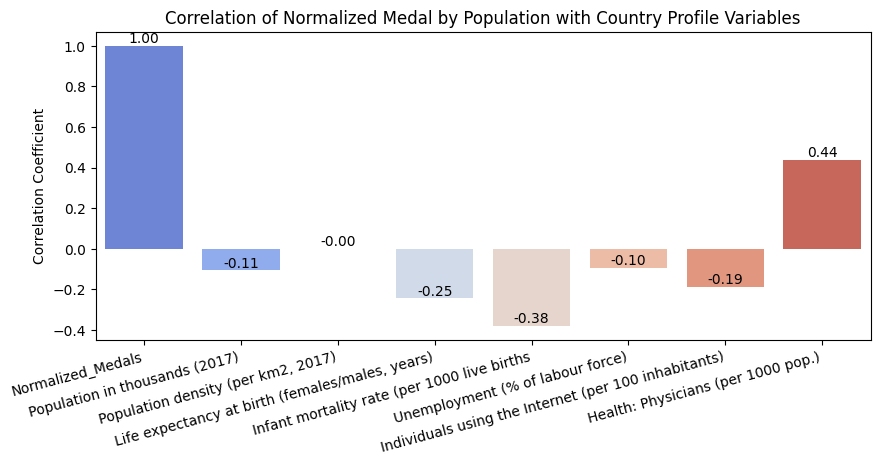

In [71]:
# Now do the same for normalized metals by population

# Select relevant columns for the heatmap
heatmap_columns = [
    'Normalized_Medals',
    'Population in thousands (2017)',
    'Population density (per km2, 2017)',
    'Life expectancy at birth (females/males, years)',
    'Infant mortality rate (per 1000 live births',
    'Unemployment (% of labour force)',
    'Individuals using the Internet (per 100 inhabitants)',
    'Health: Physicians (per 1000 pop.)',
]

# Create a new DataFrame for the heatmap
heatmap_data = medal_count_with_country_data[heatmap_columns]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Extract the 'Total' row
total_correlation = correlation_matrix.loc[['Normalized_Medals']]

# Create a horizontal bar plot with color reflecting the correlation values
plt.figure(figsize=(10, 4))
bar_plot_2 = sns.barplot(x=total_correlation.columns, y=total_correlation.values.flatten(), palette='coolwarm')
plt.title('Correlation of Normalized Medal by Population with Country Profile Variables')
plt.ylabel('Correlation Coefficient')

# Rotate x-axis labels
plt.xticks(rotation=15, ha='right')

# Add correlation values on each bar
for index, value in enumerate(total_correlation.values.flatten()):
    bar_plot_2.text(index, value, f'{value:.2f}', ha='center', va='bottom', color='black')

    plt.savefig('bar_plot_2.png', bbox_inches='tight', dpi=300)

plt.show()


plt.close()

In [64]:
# Bring in the final data set to consider - mean heights by country

mean_heights_data = pd.read_csv('mean-height-males-vs-females.csv')

# Filter rows where the year is 1996 - most recent year in the data, not a huge deal as height doesn't fluctuate too much over years
mean_heights_1996 = mean_heights_data[mean_heights_data['Year'] == 1996]

# Display the filtered data
print(mean_heights_1996.head())

             Entity Code  Year  Mean male height (cm)  \
101     Afghanistan  AFG  1996             165.255861   
204         Albania  ALB  1996             173.388856   
306         Algeria  DZA  1996             170.071800   
408  American Samoa  ASM  1996             176.045121   
510         Andorra  AND  1996             176.060167   

     Mean female height (cm) Continent  
101               155.075323       NaN  
204               161.769856       NaN  
306               159.089622       NaN  
408               164.521367       NaN  
510               162.904877       NaN  


In [65]:
olympic_data = pd.read_csv('athlete_events.csv')

# Step 1: Filter the Data
medalists = olympic_data.dropna(subset=['Medal'])

# Step 2: Calculate Average Height
average_heights = medalists.groupby(['Sport', 'Sex'])['Height'].mean().dropna()

# Display the results
print("Average Height by Sport and Sex:")
print(average_heights)

Average Height by Sport and Sex:
Sport             Sex
Alpine Skiing     F      168.232044
                  M      179.186441
Archery           F      167.138614
                  M      178.935780
Art Competitions  M      174.000000
                            ...    
Water Polo        M      188.221298
Weightlifting     F      160.076190
                  M      169.274827
Wrestling         F      163.823529
                  M      173.230934
Name: Height, Length: 103, dtype: float64


In [66]:
# Merge dataframes on 'entity' in the height data and 'team' in the athlete data
medalists = pd.merge(medalists, mean_heights_1996, left_on='Team', right_on='Entity', how='left')

# Print the merged data to inspect
print(medalists.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
1  15      Arvo Ossian Aaltonen   M  30.0     NaN     NaN         Finland   
2  15      Arvo Ossian Aaltonen   M  30.0     NaN     NaN         Finland   
3  16  Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0         Finland   
4  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   

   NOC        Games  Year_x  ...       City       Sport  \
0  DEN  1900 Summer    1900  ...      Paris  Tug-Of-War   
1  FIN  1920 Summer    1920  ...  Antwerpen    Swimming   
2  FIN  1920 Summer    1920  ...  Antwerpen    Swimming   
3  FIN  2014 Winter    2014  ...      Sochi  Ice Hockey   
4  FIN  1948 Summer    1948  ...     London  Gymnastics   

                                    Event   Medal   Entity Code  Year_y  \
0             Tug-Of-War Men's Tug-Of-War    Gold      NaN  NaN     NaN   
1  Swimming Men's 200 metres Bre

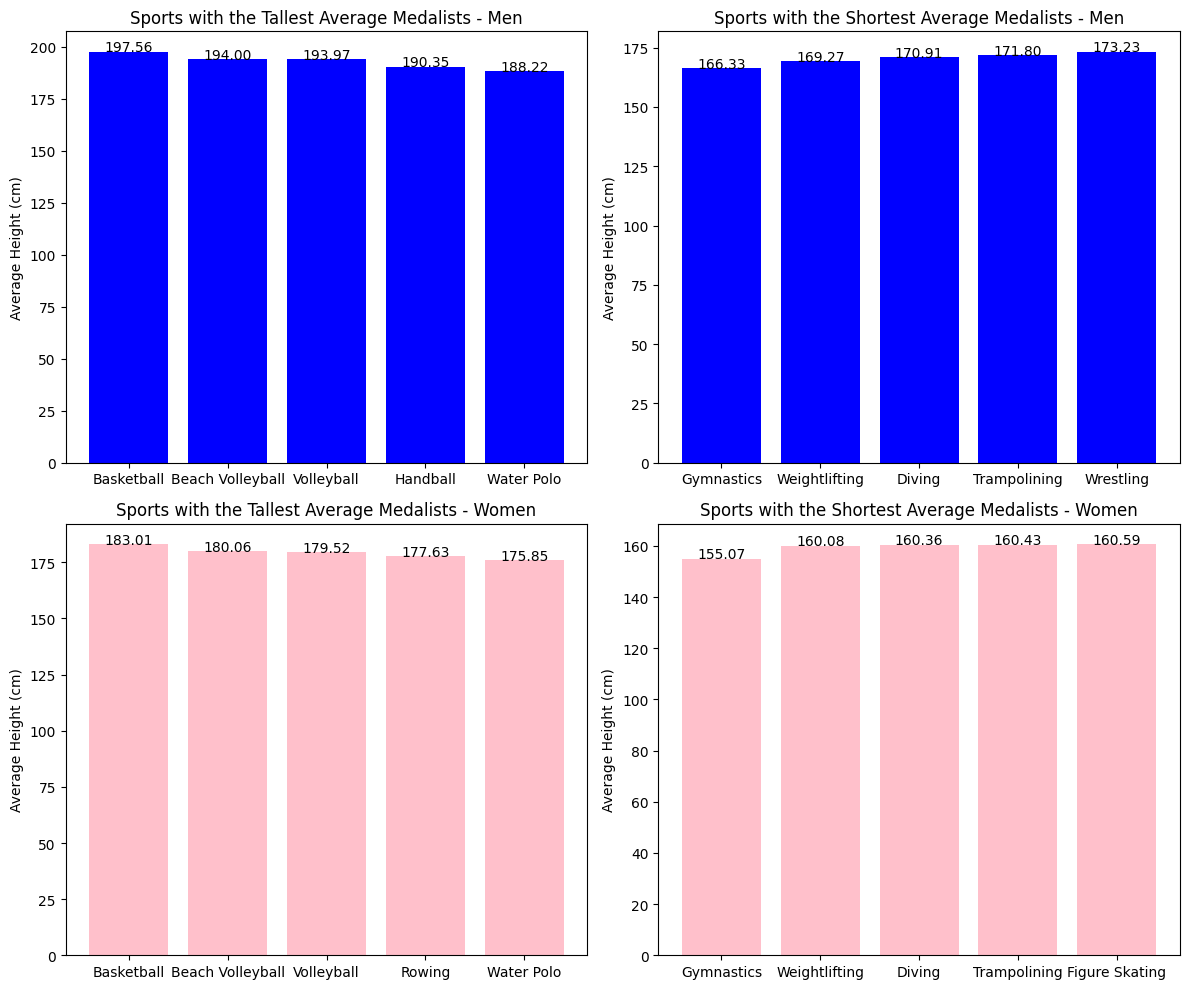

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'average_heights' and 'medalists' DataFrames are already defined

# Reset index to convert the Series to DataFrame
average_heights_df = average_heights.reset_index()

# Separate medalist data into Men and Women
average_heights_men = average_heights_df[average_heights_df['Sex'] == 'M']
average_heights_women = average_heights_df[average_heights_df['Sex'] == 'F']

# Top 5 and Bottom 5 average height for Men by sport
top5_men = average_heights_men.groupby('Sport')['Height'].mean().nlargest(5)
bottom5_men = average_heights_men.groupby('Sport')['Height'].mean().nsmallest(5)

# Top 5 and Bottom 5 average height for Women by sport
top5_women = average_heights_women.groupby('Sport')['Height'].mean().nlargest(5)
bottom5_women = average_heights_women.groupby('Sport')['Height'].mean().nsmallest(5)

# Create subplot axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Top 5 Men
axes[0, 0].bar(top5_men.index, top5_men.values, color='blue')
axes[0, 0].set_title('Sports with the Tallest Average Medalists - Men')
axes[0, 0].set_ylabel('Average Height (cm)')
for i, v in enumerate(top5_men.values):
    axes[0, 0].text(i, v + 0.2, f'{v:.2f}', ha='center')

# Bottom 5 Men
axes[0, 1].bar(bottom5_men.index, bottom5_men.values, color='blue')
axes[0, 1].set_title('Sports with the Shortest Average Medalists - Men')
axes[0, 1].set_ylabel('Average Height (cm)')
for i, v in enumerate(bottom5_men.values):
    axes[0, 1].text(i, v + 0.2, f'{v:.2f}', ha='center')

# Top 5 Women
axes[1, 0].bar(top5_women.index, top5_women.values, color='pink')
axes[1, 0].set_title('Sports with the Tallest Average Medalists - Women')
axes[1, 0].set_ylabel('Average Height (cm)')
for i, v in enumerate(top5_women.values):
    axes[1, 0].text(i, v + 0.2, f'{v:.2f}', ha='center')

# Bottom 5 Women
axes[1, 1].bar(bottom5_women.index, bottom5_women.values, color='pink')
axes[1, 1].set_title('Sports with the Shortest Average Medalists - Women')
axes[1, 1].set_ylabel('Average Height (cm)')
for i, v in enumerate(bottom5_women.values):
    axes[1, 1].text(i, v + 0.2, f'{v:.2f}', ha='center')

# Adjust layout for better readability
plt.tight_layout()

# Save the figure before showing it
plt.savefig('bar_charts.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

# Close the plot to release memory
plt.close(fig)


In [68]:
import plotly.express as px

tall_male_sports = ['Basketball', 'Beach Volleyball', 'Volleyball', 'Handball', 'Water Polo']

# Filter medalists data for male athletes and tall sports
filtered_medalists = medalists[(medalists['Sex'] == 'M') & (medalists['Sport'].isin(tall_male_sports))]

# Calculate medal count by team
medal_count_by_team = filtered_medalists.groupby('Team')['Medal'].count().reset_index()

# Merge with average male height data
merged_data = pd.merge(medal_count_by_team, mean_heights_1996, left_on='Team', right_on='Entity', how='left')

# Filter out rows with NaN values in 'Mean male height (cm)'
merged_data_filtered = merged_data.dropna(subset=['Mean male height (cm)'])

# Create a scatter plot with Plotly Express
fig = px.scatter(
    merged_data_filtered,
    x='Mean male height (cm)',
    y='Medal',
    size='Medal',
    hover_data=['Team'],
    labels={'Mean male height (cm)': 'Average Male Height (cm)', 'Medal': 'Number of Medals Won'},
    title='Number of Medals Won by Country in Historically "Tall" Male Sports vs Average Male Height',
    trendline='ols'
)

# Remove legend
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

html_string_men = fig.to_html(full_html=True)

# Save the HTML string to a file
with open('scatter_plot_men_full.html', 'w') as f:
    f.write(html_string_men)

In [69]:
import plotly.express as px

tall_female_sports = ['Basketball', 'Beach Volleyball', 'Volleyball', 'Rowing', 'Water Polo']

# Filter medalists data for female athletes and tall sports
filtered_medalists_women = medalists[(medalists['Sex'] == 'F') & (medalists['Sport'].isin(tall_female_sports))]

# Calculate medal count by team
medal_count_by_team_women = filtered_medalists_women.groupby('Team')['Medal'].count().reset_index()

# Merge with average female height data
merged_data_women = pd.merge(medal_count_by_team_women, mean_heights_1996, left_on='Team', right_on='Entity', how='left')

# Filter out rows with NaN values in 'Mean female height (cm)'
merged_data_filtered_women = merged_data_women.dropna(subset=['Mean female height (cm)'])

# Create a scatter plot with Plotly Express for women
fig_women = px.scatter(
    merged_data_filtered_women,
    x='Mean female height (cm)',
    y='Medal',
    size='Medal',
    hover_data=['Team'],
    labels={'Mean female height (cm)': 'Average Female Height (cm)', 'Medal': 'Number of Medals Won'},
    title='Number of Medals Won by Country in Historically "Tall" Female Sports vs Average Female Height',
    trendline='ols'
)

# Remove legend
fig_women.update_layout(showlegend=False)

# Show the plot for women
fig_women.show()

html_string_women = fig_women.to_html(full_html=True)

# Optionally, you can save this to an HTML file
with open('scatter_plot_women_full.html', 'w') as f:
    f.write(html_string_women)

Note that "tall" sports in the plots above reflect the 5 sports found with the tallest average maedalists above